This anlysis is taken from:  
http://www.real-statistics.com/regression/hypothesis-testing-significance-regression-line-slope/comparing-slopes-two-independent-samples/

### Motivation
This notebook is being created to get some practice with comparing the significance in the difference between the slopes of two regression lines.  The reference above was done in Excel.

### Problem Statement and Definitions
Start with two sets of data: logevity vs. number of cigarettes per day for two populations, one for men and one for women.  

The test statistic is:  
\begin{align*}
t = \frac{w_{1, men} - w_{1, women}}{\sqrt{s_{w_{1, men}}^2 + s_{w_{1, women}}^2}}
\end{align*}

Let's start with a quick plot.

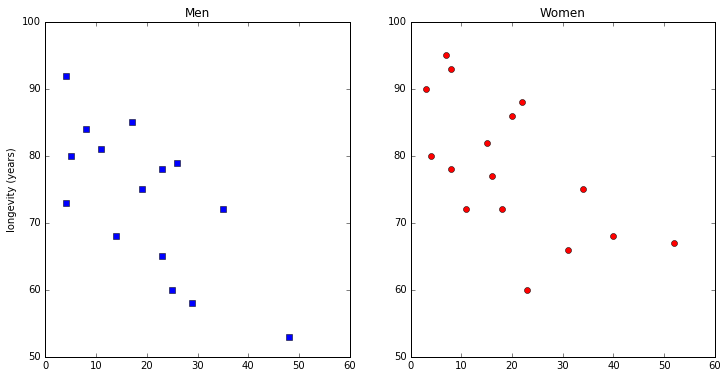

In [50]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# make analysis repeatable by referencing data available online
men_data = pd.read_csv('https://raw.githubusercontent.com/MichaelSzczepaniak/SlopeInference/master/men_cig_life_exp.csv')
women_data = pd.read_csv('https://raw.githubusercontent.com/MichaelSzczepaniak/SlopeInference/master/women_cig_life_exp.csv')


fig = plt.figure(1, figsize=(12, 6))

ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1, sharey=ax1)

ax1.set_title('Men')
ax2.set_title('Women')

ax1.set_xlim(0, 60); ax2.set_xlim(0, 60)
ax1.set_ylim(50, 100); ax2.set_ylim(50, 100)
ax1.set_ylabel('longevity (years)')

ax1.plot(men_data['cig_x'], men_data['life_exp'], 'bs')
ax2.plot(women_data['cig_x'], women_data['life_exp'], 'ro')

Looks like it trends down with increasing number of cigarettes per day. Let's add some regression lines to see this more clearly.

In [51]:
def trainLinear(X, T):
    """ Returns a (D+1, k) column vector of weights for the linear regression of
    T vs. X.  Parameters:
    X is a n by D matrix of features, n = number of samples, D = dimensions (feature count)
    T is a n by k matrix of targets, n = number of samples, k = number of targets
    """
    X1 = np.hstack((np.ones((len(X), 1)), X))  # N x 1 vector of 1's hstack with X
    w = np.linalg.lstsq(np.dot(X1.T,X1), np.dot(X1.T, T))
    
    return w[0]

def useLinear(x, w, transpose_weights=False):
    """ Returns a (n, k) matrix of linear regression targets.  Where
    x is a n by D matrix of features, n = number of samples, D = dimensions (feature count)
    w is a (D+1, k) matrix of weights
    """
    x1 = np.hstack((np.ones((len(x), 1)), x))  # N x 1 vector of 1's hstack with X
    if(transpose_weights):
        return np.dot(x1, w.T)
    else:
        return np.dot(x1, w)

In [52]:
# Compute the weights for the regression lines
X_men = np.array(men_data['cig_x'])[:, np.newaxis]  # need the np.newaxix to make this (n, 1) col vector
T_men = np.array(men_data['life_exp'])[:, np.newaxis]
X_women = np.array(women_data['cig_x'])[:, np.newaxis]
T_women = np.array(women_data['life_exp'])[:, np.newaxis]
w_men = trainLinear(X_men, T_men)
w_women = trainLinear(X_women, T_women)
w_men, w_women  # slopes match http://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/Comparing-regression-line-slopes.png

(array([[ 85.72042119],
        [ -0.62820041]]), array([[ 87.18576268],
        [ -0.46785962]]))

In [53]:
# get the unique x values from original data compute prediction and sort
X_men = np.sort(np.unique(X_men), 0)[:, np.newaxis]
X_women = np.sort(np.unique(X_women), 0)[:, np.newaxis]
# compute predicted targets
T_men = useLinear(X_men, w_men)
T_women = useLinear(X_women, w_women)

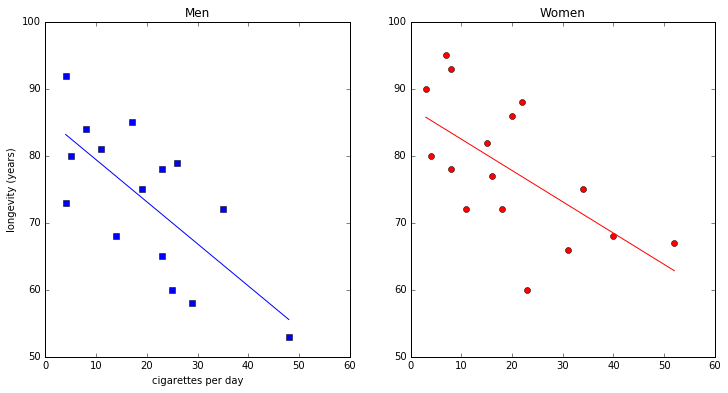

In [54]:
fig = plt.figure(1, figsize=(12, 6))
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1, sharey=ax1)

ax1.set_title('Men')
ax2.set_title('Women')

ax1.set_xlim(0, 60); ax2.set_xlim(0, 60)
ax1.set_ylim(50, 100); ax2.set_ylim(50, 100)
ax1.set_ylabel('longevity (years)')
ax1.set_xlabel('cigarettes per day')

ax1.plot(men_data['cig_x'], men_data['life_exp'], 'bs')
ax1.plot(X_men, T_men, 'b')
ax2.plot(women_data['cig_x'], women_data['life_exp'], 'ro')
ax2.plot(X_women, T_women, 'r')

Slopes look different enough to suggest women may be more imune to the impact of cigarettes than men, but we need to do the proper statistical test on these values to see if this is really true or not.

In [55]:
n_men = men_data.shape[0]
n_women = women_data.shape[0]
# get the slopes, start by getting x and targets for each class (men, women)
x_men = np.array(men_data['cig_x'])[:, np.newaxis]
t_men = np.array(men_data['life_exp'])[:, np.newaxis]
x_women = np.array(women_data['cig_x'])[:, np.newaxis]
t_women = np.array(women_data['life_exp'])[:, np.newaxis]
# row 5 of http://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/Comparing-regression-line-slopes.png
slope_men = trainLinear(x_men, t_men)[1]        # should be -0.6282
slope_women = trainLinear(x_women, t_women)[1]  # should be -0.4679
slope_men, slope_women

(array([-0.62820041]), array([-0.46785962]))

In [56]:
# row 7 of http://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/Comparing-regression-line-slopes.png
s_x_men = np.std(x_men, ddof=1); s_x_women = np.std(x_women, ddof=1)
s_x_men, s_x_women

(12.45448857698644, 13.851594372730768)

In [57]:
s_x_men**2  # should be top left element of cov matrix

155.11428571428573

In [58]:
np.cov(x_men.T, t_men.T)  # r1, c1 element is correct

array([[ 155.11428571,  -97.44285714],
       [ -97.44285714,  120.26666667]])

In [59]:
r2_men = np.corrcoef(x_men.T, t_men.T)[1][0]**2 # r=-0.71343 as shown in example, r^2=0.5090
r2_women = np.corrcoef(x_women.T, t_women.T)[1][0]**2
r2_men, r2_women

(0.50898261372526732, 0.39057495080349064)

In [60]:
# std. dev. of the targets (longevity) for men and women
s_y_men = np.std(t_men, ddof=1); s_y_women = np.std(t_women, ddof=1)
s_y_men, s_y_women  # s_y_men=10.96662

(10.966616007988366, 10.369627122836514)

In [61]:
# 
syx_men = s_y_men * np.sqrt((1-r2_men)*(n_men-1)/(n_men-2))  # 7.97468
syx_women = s_y_women * np.sqrt((1-r2_women)*(n_women-1)/(n_women-2))
syx_men, syx_women

(7.9746827306891683, 8.3792452578993188)

In [62]:
sb_men = syx_men / (s_x_men * np.sqrt(n_men-1))
sb_women = syx_women / (s_x_women * np.sqrt(n_women-1))
sb_men, sb_women  # 0.171129, 0.156192

(0.17112895461639729, 0.15619225948227389)

We now have everything we need to calculate the t-statistic which is:  
\begin{align*}
t = \frac{w_{1, men} - w_{1, women}}{\sqrt{s_{w_{1, men}}^2 + s_{w_{1, women}}^2}}
\end{align*}
Start with computing the standard error of this distribution which is the denominator of the above expression or:
\begin{align*}
\sqrt{s_{w_{1, men}}^2 + s_{w_{1, women}}^2}
\end{align*}

In [63]:
sdev_slope_diff = np.sqrt(sb_men**2 + sb_women**2)
sdev_slope_diff  # 0.231692

0.23169190972124801